In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('stratified_sample_10k.csv')
df.head()

,icon,precipIntensity,apparentTemperature,cloudCover,ozone,visibility,humidity,windBearing,precipType,pressure,...,precipAccumulation,windSpeed,uvIndex,precipProbability,summary,dewPoint,city,local_time,demand,region
0,clear-night,0.0020,50.83,0.10,295.3,10.000,0.46,124.0,rain,1011.1,...,NaN,4.10,0.0,0.01,Clear,30.83,phoenix,2020-02-09 11:00:00,2538.0,NaN
1,clear-day,0.0000,100.66,0.01,288.7,10.000,0.36,230.0,NaN,1011.0,...,NaN,5.59,9.0,0.00,Clear,65.63,phoenix,2019-08-25 21:00:00,5716.0,NaN
2,partly-cloudy-night,0.0010,41.42,0.72,387.9,10.000,0.81,171.0,rain,1016.9,...,NaN,3.58,0.0,0.03,Mostly Cloudy,37.91,seattle,2019-12-18 04:00:00,945.0,NaN
3,partly-cloudy-day,0.0000,67.60,0.64,277.3,7.578,0.94,110.0,NaN,1027.7,...,NaN,2.44,0.0,0.00,Mostly Cloudy,65.15,philadelphia,2019-09-10 12:00:00,5165.0,PE
4,clear-night,0.0005,94.10,0.08,291.0,10.000,0.72,165.0,rain,1010.3,...,NaN,10.84,0.0,0.01,Humid,75.19,dallas,2019-08-18 07:00:00,13855.0,NCEN


In [28]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   icon                 10000 non-null  object 
 1   precipIntensity      10000 non-null  float64
 2   apparentTemperature  10000 non-null  float64
 3   cloudCover           10000 non-null  float64
 4   ozone                8801 non-null   float64
 5   visibility           10000 non-null  float64
 6   humidity             10000 non-null  float64
 7   windBearing          9999 non-null   float64
 8   precipType           5475 non-null   object 
 9   pressure             9994 non-null   float64
 10  windGust             9998 non-null   float64
 11  temperature          10000 non-null  float64
 12  time                 10000 non-null  object 
 13  precipAccumulation   153 non-null    float64
 14  windSpeed            9999 non-null   float64
 15  uvIndex              10000 non-null  

In [29]:
df.describe()


,precipIntensity,apparentTemperature,cloudCover,ozone,visibility,humidity,windBearing,pressure,windGust,temperature,precipAccumulation,windSpeed,uvIndex,precipProbability,dewPoint,demand
count,10000.000000,10000.000000,10000.000000,8801.000000,10000.000000,10000.000000,9999.000000,9994.000000,9998.000000,10000.000000,153.000000,9999.000000,10000.000000,10000.000000,10000.000000,9994.000000
mean,0.004953,63.446952,0.410832,304.298784,9.523628,0.650651,170.450845,1016.508015,10.579803,63.300828,0.031322,5.880506,1.344100,0.067199,48.833023,6068.284561
std,0.026203,20.076335,0.352652,40.333614,1.420723,0.234606,100.425662,6.590407,6.980882,17.609760,0.067668,3.281851,2.294694,0.156511,16.880168,4429.870124
min,0.000000,-9.000000,0.000000,204.200000,0.468000,0.030000,0.000000,987.800000,0.000000,3.580000,0.001200,0.120000,0.000000,0.000000,-19.540000,-98.000000
25%,0.000000,47.717500,0.070000,276.800000,10.000000,0.470000,92.000000,1012.100000,5.080000,49.257500,0.005900,3.410000,0.000000,0.000000,36.330000,2601.250000
50%,0.000400,62.620000,0.330000,297.000000,10.000000,0.700000,167.000000,1016.100000,8.770000,62.540000,0.011200,5.080000,0.000000,0.010000,48.110000,4783.000000
75%,0.001700,77.782500,0.740000,325.300000,10.000000,0.850000,239.000000,1020.500000,14.627500,76.810000,0.019500,7.710000,2.000000,0.040000,63.015000,8780.507807
max,1.238400,112.800000,1.000000,484.200000,10.000000,1.000000,359.000000,1041.500000,44.990000,112.800000,0.425000,27.300000,12.000000,0.990000,82.060000,25064.000000


In [31]:
df.isnull().sum()
df.drop(columns=['apparentTemperature', 'precipAccumulation', 'windGust', 'precipType'], inplace=True)

df['ozone'].fillna(df['ozone'].mean(), inplace=True)

df['region'].fillna(df['region'].mode()[0], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   icon               10000 non-null  object 
 1   precipIntensity    10000 non-null  float64
 2   cloudCover         10000 non-null  float64
 3   ozone              10000 non-null  float64
 4   visibility         10000 non-null  float64
 5   humidity           10000 non-null  float64
 6   windBearing        9999 non-null   float64
 7   pressure           9994 non-null   float64
 8   temperature        10000 non-null  float64
 9   time               10000 non-null  object 
 10  windSpeed          9999 non-null   float64
 11  uvIndex            10000 non-null  float64
 12  precipProbability  10000 non-null  float64
 13  summary            9999 non-null   object 
 14  dewPoint           10000 non-null  float64
 15  city               10000 non-null  object 
 16  local_time         1000

In [33]:
df.isnull().sum()
df.dropna(inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9987 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   icon               9987 non-null   object 
 1   precipIntensity    9987 non-null   float64
 2   cloudCover         9987 non-null   float64
 3   ozone              9987 non-null   float64
 4   visibility         9987 non-null   float64
 5   humidity           9987 non-null   float64
 6   windBearing        9987 non-null   float64
 7   pressure           9987 non-null   float64
 8   temperature        9987 non-null   float64
 9   time               9987 non-null   object 
 10  windSpeed          9987 non-null   float64
 11  uvIndex            9987 non-null   float64
 12  precipProbability  9987 non-null   float64
 13  summary            9987 non-null   object 
 14  dewPoint           9987 non-null   float64
 15  city               9987 non-null   object 
 16  local_time         9987 non-n

In [35]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(9987, 19)

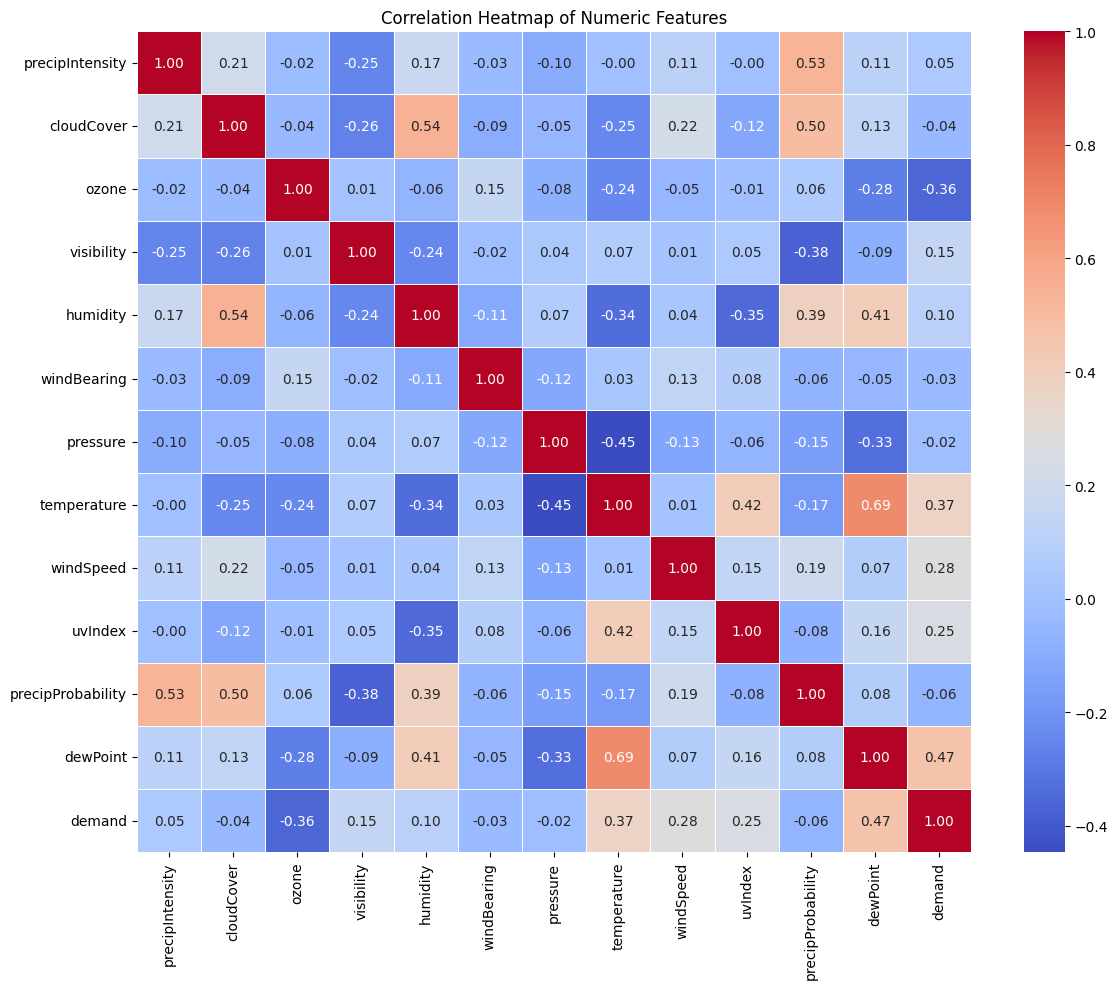

In [36]:
# Filter only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()

# Create a heatmap using seaborn for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()



In [38]:
# Function to detect outliers using IQR method
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers in each numerical column
outliers_count = {}
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outliers_count[column] = count_outliers_iqr(df, column)

# Display the results
print("Number of outliers in each column:")
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")

# Calculate percentage of outliers
total_rows = len(df)
for column, count in outliers_count.items():
    percentage = (count / total_rows) * 100
    print(f"{column}: {percentage:.2f}% of data are outliers")







Number of outliers in each column:
precipIntensity: 1519 outliers
cloudCover: 0 outliers
ozone: 523 outliers
visibility: 2388 outliers
humidity: 0 outliers
windBearing: 0 outliers
pressure: 144 outliers
temperature: 2 outliers
windSpeed: 212 outliers
uvIndex: 794 outliers
precipProbability: 1572 outliers
dewPoint: 14 outliers
demand: 168 outliers
precipIntensity: 15.21% of data are outliers
cloudCover: 0.00% of data are outliers
ozone: 5.24% of data are outliers
visibility: 23.91% of data are outliers
humidity: 0.00% of data are outliers
windBearing: 0.00% of data are outliers
pressure: 1.44% of data are outliers
temperature: 0.02% of data are outliers
windSpeed: 2.12% of data are outliers
uvIndex: 7.95% of data are outliers
precipProbability: 15.74% of data are outliers
dewPoint: 0.14% of data are outliers
demand: 1.68% of data are outliers


In [39]:
# Handle outliers based on the analysis
# For columns with significant outlier percentages, we'll cap the outliers
# We'll focus on columns with more than 5% outliers

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()
    
    # Cap the outliers
    df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound
    df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound
    
    return df_copy

# Columns with significant outlier percentages (>5%)
columns_to_cap = ['precipIntensity', 'ozone', 'visibility', 'uvIndex', 'precipProbability']

# Create a copy of the original dataframe
df_cleaned = df.copy()

# Cap outliers for each identified column
for column in columns_to_cap:
    df_cleaned = cap_outliers(df_cleaned, column)
    
# Verify the outliers have been capped
outliers_after = {}
for column in columns_to_cap:
    outliers_after[column] = count_outliers_iqr(df_cleaned, column)

# Display the results
print("Number of outliers after capping:")
for column in columns_to_cap:
    print(f"{column}: {outliers_after[column]} outliers (was {outliers_count[column]} before)")

# For columns with fewer outliers (<5%), we'll keep them as is
print("\nColumns with minimal outliers kept as is:")
for column, count in outliers_count.items():
    percentage = (count / total_rows) * 100
    if percentage < 5 and count > 0:
        print(f"{column}: {count} outliers ({percentage:.2f}%)")

# Compare statistics before and after capping
print("\nStatistics comparison for columns with significant outliers:")
for column in columns_to_cap:
    print(f"\n{column}:")
    print("Before capping:")
    print(df[column].describe()[['min', 'max', 'mean', 'std']])
    print("After capping:")
    print(df_cleaned[column].describe()[['min', 'max', 'mean', 'std']])


Number of outliers after capping:
precipIntensity: 0 outliers (was 1519 before)
ozone: 0 outliers (was 523 before)
visibility: 0 outliers (was 2388 before)
uvIndex: 0 outliers (was 794 before)
precipProbability: 0 outliers (was 1572 before)

Columns with minimal outliers kept as is:
pressure: 144 outliers (1.44%)
temperature: 2 outliers (0.02%)
windSpeed: 212 outliers (2.12%)
dewPoint: 14 outliers (0.14%)
demand: 168 outliers (1.68%)

Statistics comparison for columns with significant outliers:

precipIntensity:
Before capping:
min     0.000000
max     1.238400
mean    0.004954
std     0.026216
Name: precipIntensity, dtype: float64
After capping:
min     0.000000
max     0.004250
mean    0.001174
std     0.001548
Name: precipIntensity, dtype: float64

ozone:
Before capping:
min     204.200000
max     484.200000
mean    304.300966
std      37.849657
Name: ozone, dtype: float64
After capping:
min     218.850000
max     381.650000
mean    303.172394
std      34.818897
Name: ozone, dtype: 

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9987 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   icon               9987 non-null   object 
 1   precipIntensity    9987 non-null   float64
 2   cloudCover         9987 non-null   float64
 3   ozone              9987 non-null   float64
 4   visibility         9987 non-null   float64
 5   humidity           9987 non-null   float64
 6   windBearing        9987 non-null   float64
 7   pressure           9987 non-null   float64
 8   temperature        9987 non-null   float64
 9   time               9987 non-null   object 
 10  windSpeed          9987 non-null   float64
 11  uvIndex            9987 non-null   float64
 12  precipProbability  9987 non-null   float64
 13  summary            9987 non-null   object 
 14  dewPoint           9987 non-null   float64
 15  city               9987 non-null   object 
 16  local_time         9987 non-n

In [42]:
# Feature Engineering

# 1. Time-based features
print("\nCreating time-based features...")
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.dayofweek  # 0 is Monday, 6 is Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# 2. Season feature
df['season'] = df['month'].apply(lambda x: 
                               'Winter' if x in [12, 1, 2] else
                               'Spring' if x in [3, 4, 5] else
                               'Summer' if x in [6, 7, 8] else
                               'Fall')

# 3. Temperature-related features
print("Creating temperature-related features...")
# Heat index (simplified version)
df['heat_index'] = df.apply(lambda x: 
                          x['temperature'] if x['humidity'] < 0.4 else
                          x['temperature'] + 0.5 * (x['humidity'] * 10), axis=1)

# Temperature difference from daily mean (if we have enough data points)
temp_daily_avg = df.groupby([df['time'].dt.date])['temperature'].transform('mean')
df['temp_diff_from_daily_avg'] = df['temperature'] - temp_daily_avg

# 4. Weather condition features
print("Creating weather condition features...")
# Binary features for precipitation
df['is_rainy'] = df['precipProbability'].apply(lambda x: 1 if x > 0.5 else 0)
df['is_cloudy'] = df['cloudCover'].apply(lambda x: 1 if x > 0.5 else 0)

# 5. Demand-related features
print("Creating demand-related features...")
# Time periods (morning, afternoon, evening, night)
df['time_of_day'] = df['hour'].apply(lambda x: 
                                   'Night' if x < 6 else
                                   'Morning' if x < 12 else
                                   'Afternoon' if x < 18 else
                                   'Evening')

# 6. Interaction features
print("Creating interaction features...")
# Temperature and humidity interaction (feels-like)
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']

# Display the new features
print("\nNew features added:")
new_features = ['hour', 'day', 'month', 'day_of_week', 'is_weekend', 'season', 
                'heat_index', 'temp_diff_from_daily_avg', 'is_rainy', 'is_cloudy', 
                'time_of_day', 'temp_humidity_interaction']
print(df[new_features].head())

# Check for any missing values in the new features
missing_values = df[new_features].isnull().sum()
print("\nMissing values in new features:")
print(missing_values[missing_values > 0])



Creating time-based features...
Creating temperature-related features...
Creating weather condition features...
Creating demand-related features...
Creating interaction features...

New features added:
   hour  day  month  day_of_week  is_weekend  season  heat_index  \
0    11    9      2            6           1  Winter       53.13   
1    21   25      8            6           1  Summer       97.17   
2     4   18     12            2           0  Winter       47.28   
3    12   10      9            1           0    Fall       71.49   
4     7   18      8            6           1  Summer       88.87   

   temp_diff_from_daily_avg  is_rainy  is_cloudy time_of_day  \
0                 -2.933000         0          0     Morning   
1                 18.231111         0          0     Evening   
2                 -3.896667         0          1       Night   
3                -14.347222         0          1   Afternoon   
4                 -1.990909         0          0     Morning   

   

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9987 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   icon                       9987 non-null   object        
 1   precipIntensity            9987 non-null   float64       
 2   cloudCover                 9987 non-null   float64       
 3   ozone                      9987 non-null   float64       
 4   visibility                 9987 non-null   float64       
 5   humidity                   9987 non-null   float64       
 6   windBearing                9987 non-null   float64       
 7   pressure                   9987 non-null   float64       
 8   temperature                9987 non-null   float64       
 9   time                       9987 non-null   datetime64[ns]
 10  windSpeed                  9987 non-null   float64       
 11  uvIndex                    9987 non-null   float64       
 12  precipProba

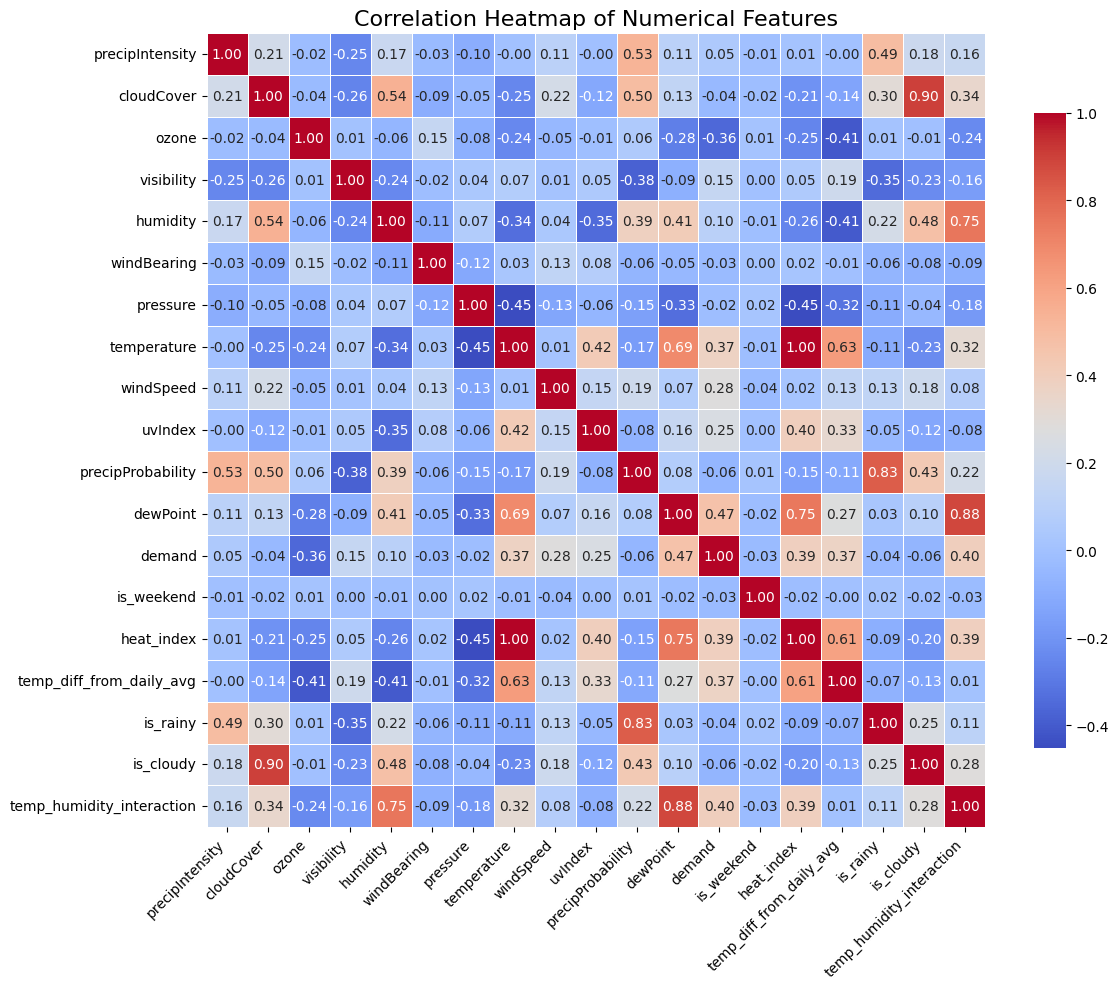

In [47]:
# Create a correlation heatmap to visualize relationships between features
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a larger figure for better readability
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color map (red for positive, blue for negative)
            fmt='.2f',            # Format for correlation values (2 decimal places)
            linewidths=0.5,       # Width of lines between cells
            cbar_kws={"shrink": 0.8})  # Customize the colorbar

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




In [45]:
df.to_csv('dataset_cleaned.csv', index=False)
